In [1]:
%load_ext ipydex.displaytools

import time
time.ctime() ##

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sympy as sp
from sympy.interactive import printing
printing.init_printing()

import symbtools as st


%matplotlib inline

### Polynomial transition

In [2]:
t = sp.Symbol("t")

In [3]:
T0 = 0
T1 = 1.5

y0 = 0
y1 = 2


poly1 = st.condition_poly(t, (T0, y0, 0, 0), (T1, y1, 0, 0)) ##:

poly1_func = st.expr_to_func(t, poly1)

---


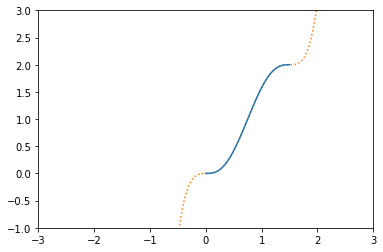

In [4]:
tt1 = np.linspace(T0, T1, 1000)
tt2 = np.linspace(-3, 3, 1000)
plt.plot(tt1, poly1_func(tt1))

ax = plt.axis()

plt.plot(tt2, poly1_func(tt2), ':', zorder=-1)
plt.axis([-3, 3, -1, 3])


In [5]:
full_transition = st.piece_wise((y0, t < T0), (poly1, t<T1), (y1, True))
full_transition_func = st.expr_to_func(t, full_transition)

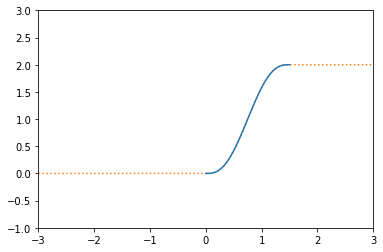

In [6]:

plt.plot(tt1, full_transition_func(tt1))

ax = plt.axis()

plt.plot(tt2, full_transition_func(tt2), ':', zorder=-1)
plt.axis([-3, 3, -1, 3])

### Exponentially faded Parabola (penalty function)

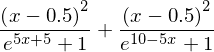

---


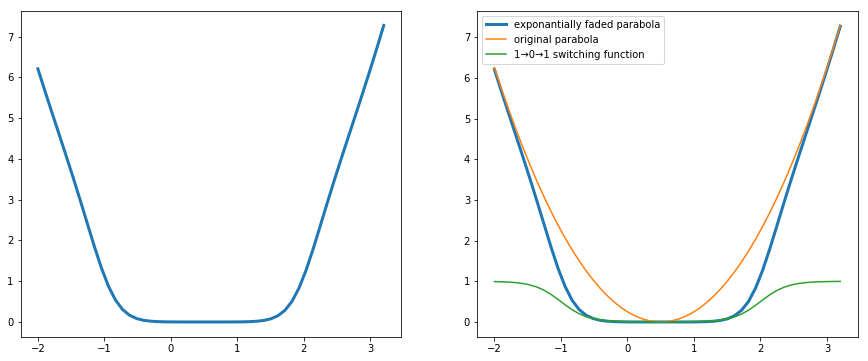

In [20]:
x = sp.Symbol("x")
xmin, xmax = -1, 2

pe = st.penalty_expression(x, xmin, xmax) ##:

pefnc = st.expr_to_func(x, pe)

xx = np.linspace(-2, 3.2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6));

ax1.plot(xx, pefnc(xx), lw=3, label="exponantially faded parabola")

ax2.plot(xx, pefnc(xx), lw=3, label="exponantially faded parabola")
ax2.plot(xx, (xx-0.5)**2, label="original parabola")
ax2.plot(xx, pefnc(xx)/(xx-0.5)**2, label="1→0→1 switching function")
ax2.legend()